IMPORTING THE NECESSARY LIBRARIES AND FORMATTING THE DATASET

In [1]:
import keras 
import numpy as np 
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# loading the dataset
(train_x,train_y),(test_x,test_y) = cifar10.load_data()

# reshaping the dataset and flattening it to input to mlp 
train_x = train_x.reshape(50000,3072)
test_x  = test_x.reshape(10000,3072)

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

train_x = train_x/255.
test_x = test_x/255.

train_y = np_utils.to_categorical(train_y,10)
test_y = np_utils.to_categorical(test_y,10)

#(x_train,x_valid),(x_test,x_valid_test) = train_test_split(train_x,test_x,test_size=0.3)



Using TensorFlow backend.


170500096/170498071 [==============================] - 48s 0us/step


BUILDING MODEL

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 784)               2409232   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
__________

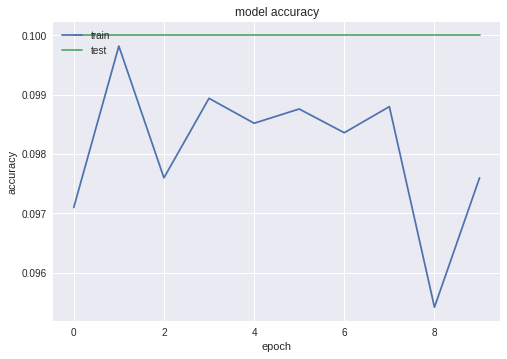

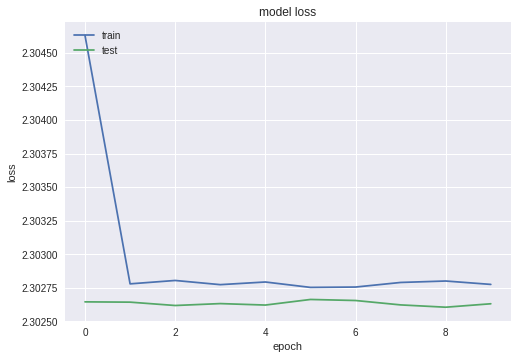

In [3]:
# mlp architecture 1
model = Sequential()
model.add(Dense(784,activation='relu',input_shape=(3072,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

model.compile(optimizer='Adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x,train_y,batch_size=32,epochs=10,
          validation_data=(test_x,test_y))

score = model.evaluate(test_x,test_y)

test_loss = score[0]
test_accuracy = score[1]

print("Loss is :",test_loss)
print("Accuracy is :",test_accuracy)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 784)               2409232   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 2,627,290
Trainable params: 2,627,290
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 99s 2ms/step - loss: 1.9043 - acc: 0.3074 - val_loss: 1.7115 - val_acc: 0.3814
Epoch 2/10
50000/50000 [==============================] - 97s 2ms/step - loss

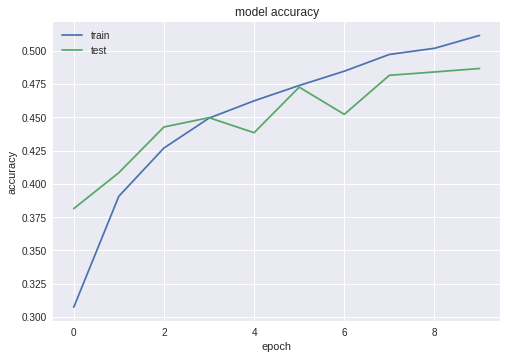

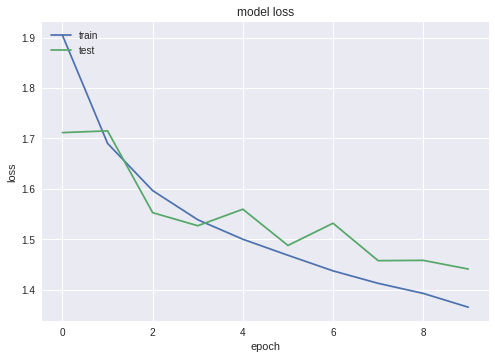

In [4]:
# mlp architecture 2
model = Sequential()
model.add(Dense(784,activation='relu',input_shape=(3072,)))
#model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

model.compile(optimizer='Adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x,train_y,batch_size=32,epochs=10,
          validation_data=(test_x,test_y))

score = model.evaluate(test_x,test_y)

print("Loss is :",score[0])
print("Accuracy is :",score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 803,786
Trainable params: 803,786
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 411us/step - loss: 1.8841 - acc: 0.3269 - val_loss: 1.7658 - val_acc: 0.3784
Epoch 2/50
50000/50000 [==============================] - 21s 410us/step - loss: 1.7057 - acc: 0.3956 - val_loss: 1.6680 - val_acc: 0.4044
Epoch 3/50
50000/50000 [==============================] - 26s 520us/step

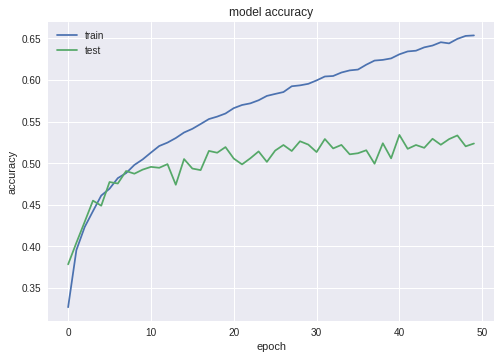

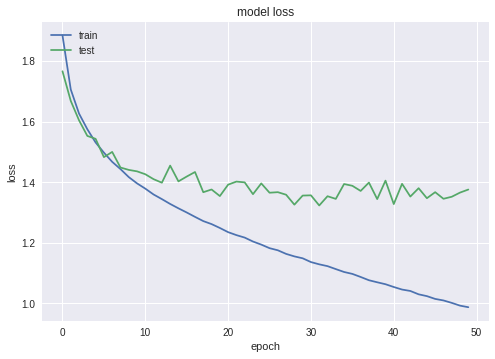

In [5]:
# mlp architecture 3
model = Sequential()
#model.add(Dense(784,activation='tanh',input_shape=(3072,)))
#model.add(Dense(512,activation='tanh'))
model.add(Dense(256,activation='relu',input_shape=(3072,)))
#model.add(Dropout(0.2))
model.add(Dense(64,activation='tanh'))
#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(optimizer=opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x,train_y,batch_size=50,epochs=50,
          validation_data=(test_x,test_y))

score = model.evaluate(test_x,test_y)

print("Loss is :",score[0])
print("Accuracy is :",score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_21 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total params: 803,786
Trainable params: 803,786
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 397us/step - loss: 2.4023 - acc: 0.0991 - val_loss: 2.3917 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 19s 390us/step - loss: 2.4035 - acc: 0.0999 - val_loss: 2.3541 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 19s 389us/step

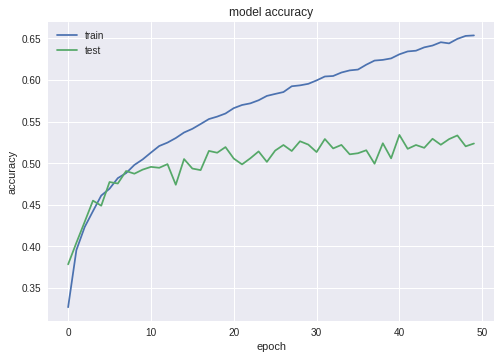

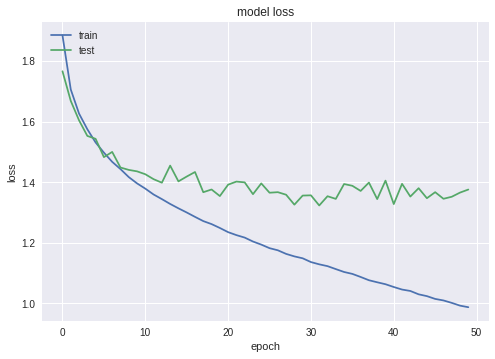

In [6]:
# mlp architecture 4
model = Sequential()
#model.add(Dense(784,activation='tanh',input_shape=(3072,)))
#model.add(Dense(512,activation='tanh'))
model.add(Dense(256,activation='relu',input_shape=(3072,)))
#model.add(Dropout(0.2))
model.add(Dense(64,activation='tanh'))
#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

opt = keras.optimizers.rmsprop(lr=0.01, decay=1e-6)

model.compile(optimizer=opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x,train_y,batch_size=50,epochs=50,
          validation_data=(test_x,test_y))

score = model.evaluate(test_x,test_y)

print("Loss is :",score[0])
print("Accuracy is :",score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 784)               2409232   
_________________________________________________________________
dense_24 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_25 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 2,627,290
Trainable params: 2,627,290
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 57s 1ms/step - loss: 2.4056 - acc: 0.0984 - val_loss: 2.4109 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 56s 1ms/step - loss

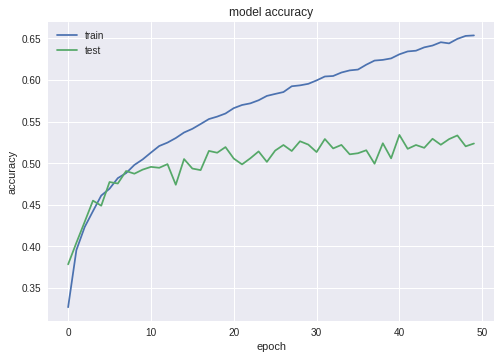

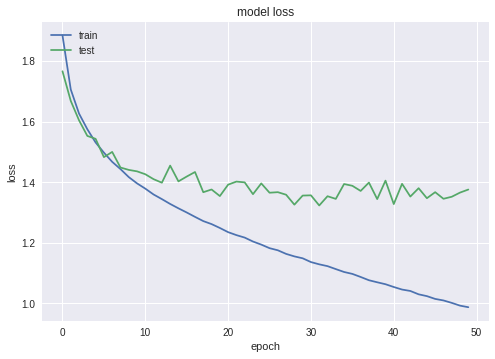

In [7]:
# mlp architecture 5
model = Sequential()
model.add(Dense(784,activation='tanh',input_shape=(3072,)))
#model.add(Dense(512,activation='tanh'))
model.add(Dense(256,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(64,activation='tanh'))
#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

opt = keras.optimizers.rmsprop(lr=0.01, decay=1e-6)

model.compile(optimizer=opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x,train_y,batch_size=50,epochs=50,
          validation_data=(test_x,test_y))

score = model.evaluate(test_x,test_y)

print("Loss is :",score[0])
print("Accuracy is :",score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 784)               2409232   
_________________________________________________________________
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 2,627,290
Trainable params: 2,627,290
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 81s 2ms/step - loss: 2.2

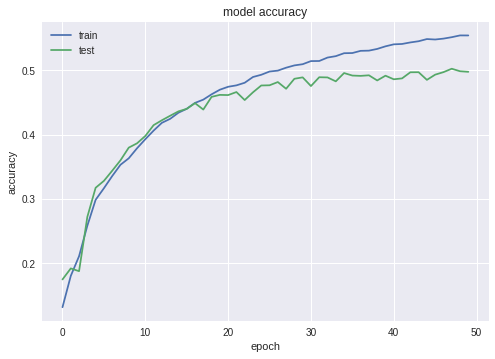

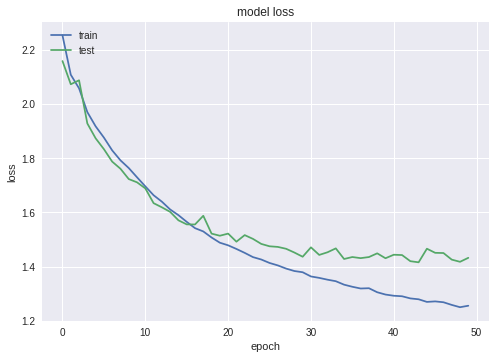

In [8]:
# mlp architecture 6
model = Sequential()
model.add(Dense(784,activation='relu',input_shape=(3072,)))
#model.add(Dense(512,activation='tanh'))
model.add(Dense(256,activation='relu'))#,input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(64,activation='tanh'))
#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

#opt = keras.optimizers.rmsprop(lr=0.01, decay=1e-6)

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x,train_y,batch_size=50,epochs=50,
          validation_data=(test_x,test_y))

score = model.evaluate(test_x,test_y)

print("Loss is :",score[0])
print("Accuracy is :",score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
# mlp architecture 7
model = Sequential()
model.add(Dense(784,activation='relu',input_shape=(3072,)))
#model.add(Dense(512,activation='tanh'))
model.add(Dense(256,activation='relu'))#,input_shape=(3072,)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

#opt = keras.optimizers.rmsprop(lr=0.01, decay=1e-6)

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_x,train_y,batch_size=32,epochs=50,
          validation_data=(test_x,test_y))

score = model.evaluate(test_x,test_y)

print("Loss is :",score[0])
print("Accuracy is :",score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 784)               2409232   
_________________________________________________________________
dense_32 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                650       
Total params: 2,627,290
Trainable params: 2,627,290
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 108s 2ms/step - loss: 2.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 784)               2409232   
_________________________________________________________________
dense_36 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_37 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                650       
Total params: 2,627,290
Trainable params: 2,627,290
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 102s 2ms/step - loss: 1.9022 - acc: 0.3117 - val_loss: 1.7430 - val_acc: 0.3784
Epoch 2/30
50000/50000 [==============================] - 102s 2ms/step - lo

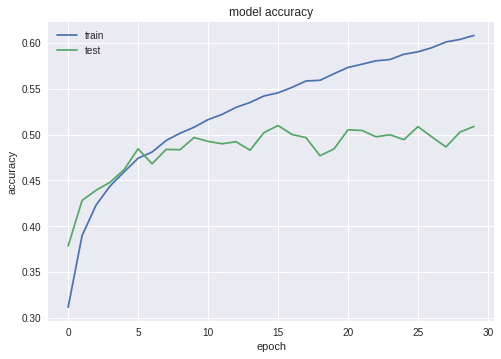

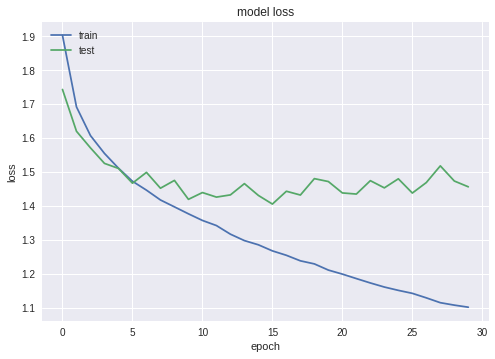

In [10]:
# mlp architecture 8
model = Sequential()
model.add(Dense(784,activation='relu',input_shape=(3072,)))
#model.add(Dense(512,activation='tanh'))
model.add(Dense(256,activation='relu'))#,input_shape=(3072,)))
#model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

#opt = keras.optimizers.rmsprop(lr=0.01, decay=1e-6)

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x,train_y,batch_size=32,epochs=30,
          validation_data=(test_x,test_y))

score = model.evaluate(test_x,test_y)

print("Loss is :",score[0])
print("Accuracy is :",score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_40 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_41 (Dense)             (None, 10)                650       
Total params: 803,786
Trainable params: 803,786
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 50s 996us/step - loss: 1.9163 - acc: 0.3034 - val_loss: 1.7828 - val_acc: 0.3546
Epoch 2/30
50000/50000 [==============================] - 46s 921us/step - loss: 1.7238 - acc: 0.3784 - val_loss: 1.6943 - val_acc: 0.3894
Epoch 3/30
50000/50000 [==============================] - 46s 917us/step

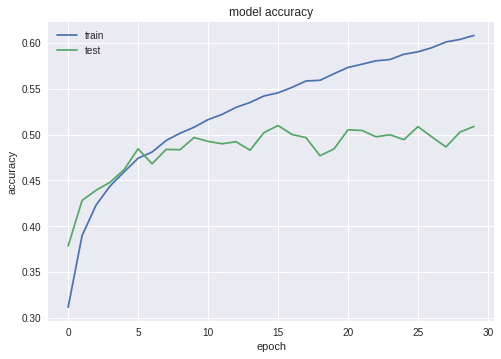

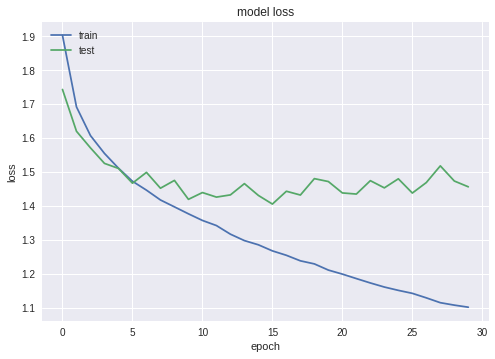

In [11]:
# mlp architecture 9
model = Sequential()
#model.add(Dense(784,activation='relu',input_shape=(3072,)))
#model.add(Dense(512,activation='tanh'))
model.add(Dense(256,activation='relu',input_shape=(3072,)))
#model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x,train_y,batch_size=24,epochs=30,
          validation_data=(test_x,test_y))

score = model.evaluate(test_x,test_y)

print("Loss is :",score[0])
print("Accuracy is :",score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_44 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_45 (Dense)             (None, 10)                650       
Total params: 1,721,802
Trainable params: 1,721,802
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 81s 2ms/step - loss: 1.8780 - acc: 0.3209 - val_loss: 1.7123 - val_acc: 0.3866
Epoch 2/30
50000/50000 [==============================] - 80s 2ms/step - loss

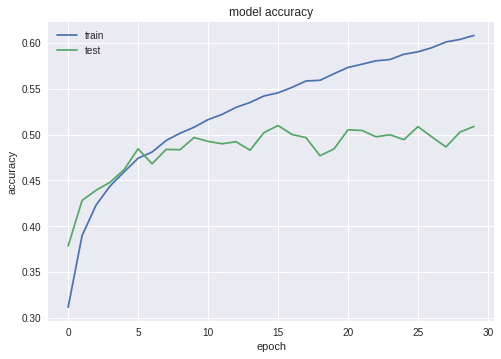

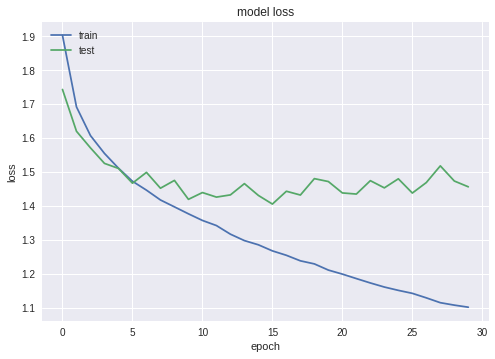

In [12]:
# mlp architecture 10
model = Sequential()
#model.add(Dense(784,activation='relu',input_shape=(3072,)))
#model.add(Dense(512,activation='tanh'))
model.add(Dense(512,activation='relu',input_shape=(3072,)))
#model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x,train_y,batch_size=32,epochs=30,
          validation_data=(test_x,test_y))

score = model.evaluate(test_x,test_y)

print("Loss is :",score[0])
print("Accuracy is :",score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                5130      
Total para

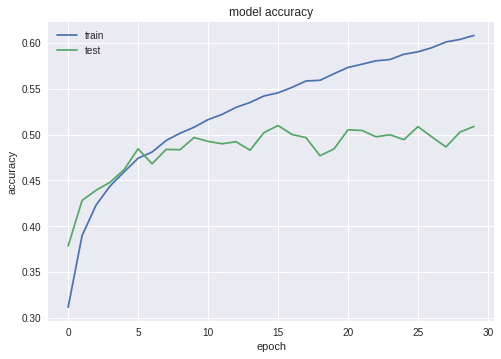

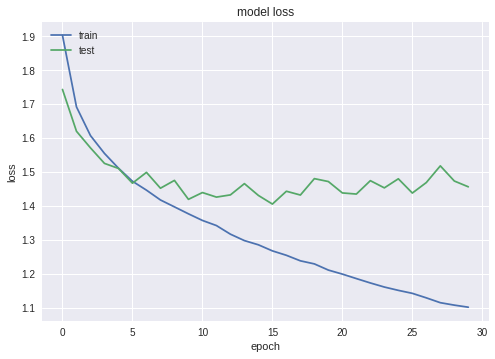

In [13]:
# mlp architecture 11
model = Sequential()
#model.add(Dense(784,activation='relu',input_shape=(3072,)))
#model.add(Dense(512,activation='tanh'))
model.add(Dense(2048,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
#model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

model.compile(optimizer='adadelta',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x,train_y,batch_size=32,epochs=10,
          validation_data=(test_x,test_y))

score = model.evaluate(test_x,test_y)

print("Loss is :",score[0])
print("Accuracy is :",score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()